<h1 style="color: #001a79;">Exercise</h1>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use numpy's polyfit to fit polynomials to the 2 datasets in the next jupyter cell.

In [1]:
# for numerical operations
import numpy as np

# dataset 1
x1 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
y1 = np.array([1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7])

# dataset 2
x2 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
y2 = np.array([5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6])

In [2]:
# import libraries...

# Optimization of cost functions
import scipy.optimize as so
import scipy.stats as ss

# for generation of qq plot
import statsmodels.api as sm
import pylab as py

# for durbin watson test
from statsmodels.stats.stattools import durbin_watson

# for auto-correlation plot
from statsmodels.graphics import tsaplots

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# format plots
sns.set_style("darkgrid")

<h2 style="color: #001a79;">Plotting the datasets</h2>

<hr style="border-top: 1px solid #001a79;" />

First lets make a function that returns the predicted y-values for the passed x and y-actual values for n degrees of freedom. This function will leverage the *polyfit* method of numpy to get an array of polynomial coefficients from the highest to lowest power. These coefficients will then be passed to numpys *polyval* method along with the predictor values to return the predicted y_values for each dataset.

In [3]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

def get_y_pred(x, y, df):
    '''returns polynomial y-predicted vals for passed x, y and degrees of freedrom'''
    # get polynomial coeffecients from high to lowest order
    params = np.polyfit(x, y, df)
    
    # return predicted y-values using coefficients and x as predictor vals
    return np.polyval(params, x)

In [4]:
# sanity check...return y_pred_vals
get_y_pred(x1, y1, 2)

array([ 137.31262255,   29.01183824,  -34.26860294,  -52.52870098,
        -25.76845588,   46.01213235,  162.81306373,  324.63433824,
        531.47595588,  783.33791667, 1080.22022059, 1422.12286765,
       1809.04585784, 2240.98919118, 2717.95286765, 3239.93688725])

In [51]:
def plot_grid(plot_idx, plot_data, plot_label):
    '''This function plots a 2x2 matrix on a pre-existing figure object'''
    
    # pull out x, y and degrees of freedom vals
    x, y, df = plot_data[0], plot_data[1], plot_data[2]

    # get predicted y polynomial vals from passed degrees of freedom
    y_pred = get_y_pred(x, y, df = df)
    
    # Plot x and y  &  x and y_pred
    axs[plot_idx].plot(x, y, 'r.')  
    axs[plot_idx].plot(x, y_pred, 'k--')  
    
    # add title to plots
    axs[plot_idx].set_title(plot_label)

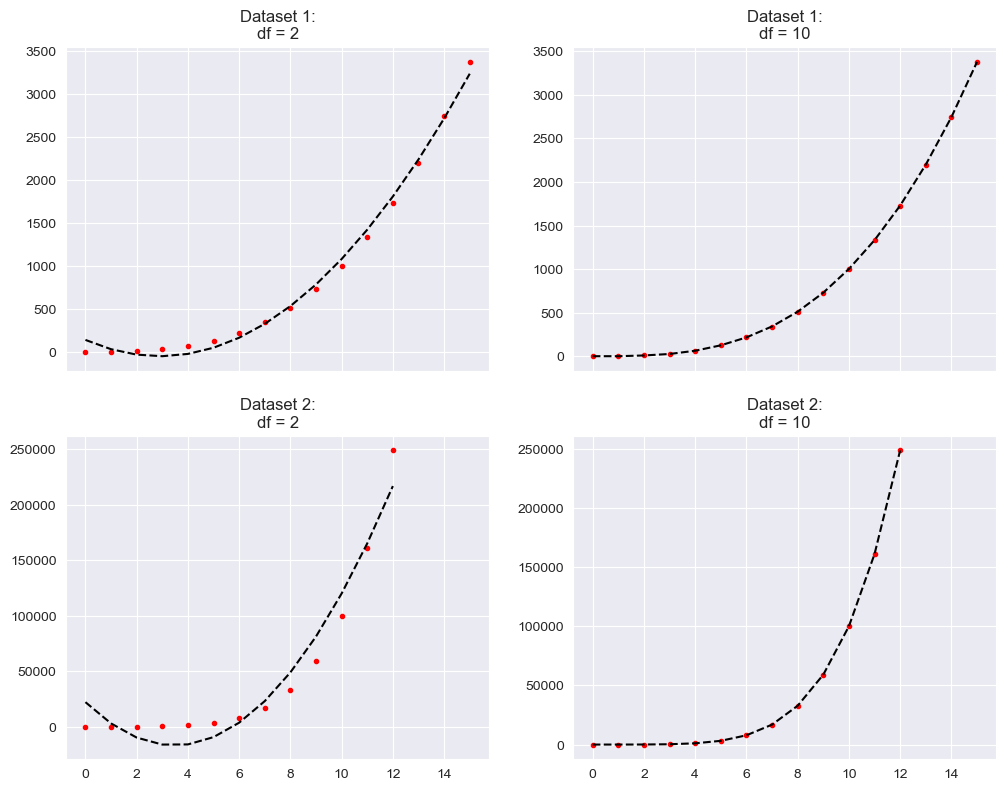

In [59]:
# lets structure the data for passing to plot grid function...

# each list element is a tuple containing x, y and degrees of freedom
plot_list = [(x1, y1, 2), (x1, y1, 10), (x2, y2, 2), (x2, y2, 10)]

# contains the title for each subplot
plot_labels = ['Dataset 1:\ndf = 2', 'Dataset 1:\ndf = 10',
               'Dataset 2:\ndf = 2', 'Dataset 2:\ndf = 10']

# generate figure with 2 rows & 2 cols
fig, axs = plt.subplots(2, 2, sharex=True, figsize = (12, 8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2, top = 1)

# generate 2d (2 x 2) array  
arr = np.arange(8).reshape(2, 2, 2)

# iterate over 2d array to get tuple of indices and index val
for index, indices in enumerate(np.ndindex(arr.shape[:2])):
    plot_grid(indices, plot_list[index], plot_labels[index])   

First lets look at the top two plots (dataset 1). We can clearly see that the 10th order polynomial model fits the line better to the data than the 2nd order model, thats not to say that it's a better model as we must be careful not to overfit the data. Overfitting is when the model is reliant on the training data. Rajbangshi (2022) describes this well by detailing how an overfitted model memorizes the training data instead of learning and understanding the underlying trend of the data [1]. The bottom two plots (dataset 2) unsurprisingly also shows a better fit for 10 degrees of freedom. Lets explore how we bridge the gap between getting a good curve fit and overfitting the model.

<h2 style="color: #001a79;">References</h2>

<hr style="border-top: 1px solid #001a79;" />

1. Rajbangshi, A, 2020, Overfitting and Underfitting in Machine Learning, medium.com, Available at [Ref Link](https://medium.com/analytics-vidhya/overfitting-and-underfitting-in-machine-learning-d829d8501335) (Accessed 11 November 2022).

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>